In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configura o tema do seaborn primeiro
sns.set_theme(style="darkgrid")

# Em seguida, definir os parâmetros globais do matplotlib
plt.rcParams.update({
    'font.family': 'serif',         # Fonte geral
    'font.serif': 'Times New Roman',# Estilo da fonte
    'font.size': 12,                # Tamanho da fonte
    'axes.labelsize': 12,           # Tamanho da fonte dos rótulos dos eixos
    'axes.titlesize': 14,           # Tamanho da fonte dos títulos dos subplots
    'xtick.labelsize': 10,          # Tamanho da fonte dos rótulos do eixo x
    'ytick.labelsize': 10,          # Tamanho da fonte dos rótulos do eixo y
    'axes.labelweight': 'bold',     # Títulos dos eixos x e y em negrito
    'legend.fontsize': 12,          # Tamanho da fonte da legenda
    'figure.titlesize': 16,         # Tamanho da fonte do título da figura
    'axes.spines.right': False,     # Remover a espinha do lado direito
    'axes.spines.top': False,       # Remover a espinha do topo
})

# Função para configurar rótulos do eixo x e y em negrito
def set_bold_labels(ax):
    ax.set_xlabel('Sex', weight='bold')
    ax.set_ylabel('Count', weight='bold')


In [3]:
#Neste caso:

# `..` : significa "um nível acima do diretório atual".
# `/data/raw/train.csv`: indica que o arquivo train.csv está dentro da pasta raw, 
# que por sua vez está dentro da pasta data.

df_train = pd.read_csv('../../data/raw/train.csv', sep=',')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Contando valores nulos em cada coluna
null_counts = df_train.isnull().sum()

# Criando um novo DataFrame com os resultados
df_null_counts = pd.DataFrame(null_counts, columns=['Null Count'])

df_null_counts.T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Null Count,0,0,0,0,0,177,0,0,0,0,687,2


In [7]:
df_train['Target'] = df_train['Survived'].map({1: 'Sobreviveu', 0: 'Não Sobreviveu'})
df_train['Pclass'] = pd.Categorical(df_train['Pclass'], categories=[1, 2, 3], ordered=True)

In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Target'],
      dtype='object')

## Categóricas
Tipos Categóricas:
- Sex
- Pclass
- Name
- SibSp
- Parch
- Cabin
- Embarked

### Variavel: Sex

In [9]:
df_sex = df_train['Sex'].value_counts(dropna=False).reset_index().merge(
        df_train['Sex'].value_counts(dropna=False, normalize=True).reset_index(), 
        how='inner', on = 'Sex')
df_sex

,Sex,count,proportion
0,male,577,0.647587
1,female,314,0.352413


In [10]:
df_sex_target = df_train.groupby(['Sex', 'Target']).size().reset_index(name='Count')
df_sex_target['proportion'] = df_sex_target.groupby('Sex')['Count'].transform(lambda x: x / x.sum())
df_sex_target

,Sex,Target,Count,proportion
0,female,Não Sobreviveu,81,0.257962
1,female,Sobreviveu,233,0.742038
2,male,Não Sobreviveu,468,0.811092
3,male,Sobreviveu,109,0.188908


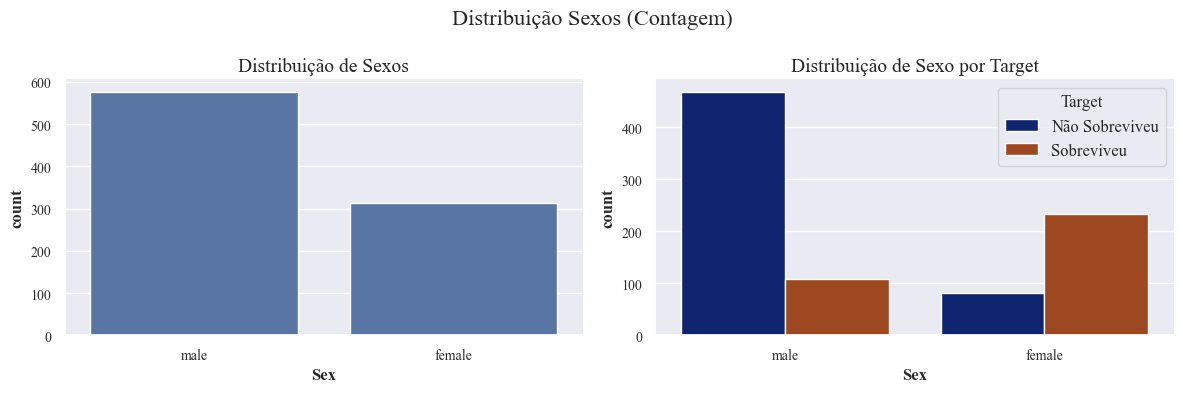

In [11]:
sex_order = ['male', 'female']
target_order = [0, 1]

fig, ax = plt.subplots(1,2, figsize=(12, 4))
fig.suptitle('Distribuição Sexos (Contagem)')
sns.countplot(ax=ax[0], data=df_train, x='Sex')
sns.countplot(ax=ax[1], data=df_train, x='Sex', hue = 'Target', palette='dark', edgecolor = 'white', order=sex_order)

ax[0].set_title('Distribuição de Sexos')
ax[1].set_title('Distribuição de Sexo por Target')

# Ajustando o layout da figura
plt.tight_layout()
plt.show()

# Outra opção
# sns.histplot(ax=ax[0], data=df_train, x='Sex')
# sns.histplot(ax=ax[1], data=df_train, x='Sex', hue = 'Target', multiple="dodge", palette='dark', edgecolor = 'white', shrink=.8)
# shrink=.8: Controla a largura das barras no gráfico. 
# multiple="dodge": Especifica o método de posicionamento dos histogramas. 
# O valor "dodge" faz com que os histogramas dos diferentes níveis de Target sejam colocados lado a lado.

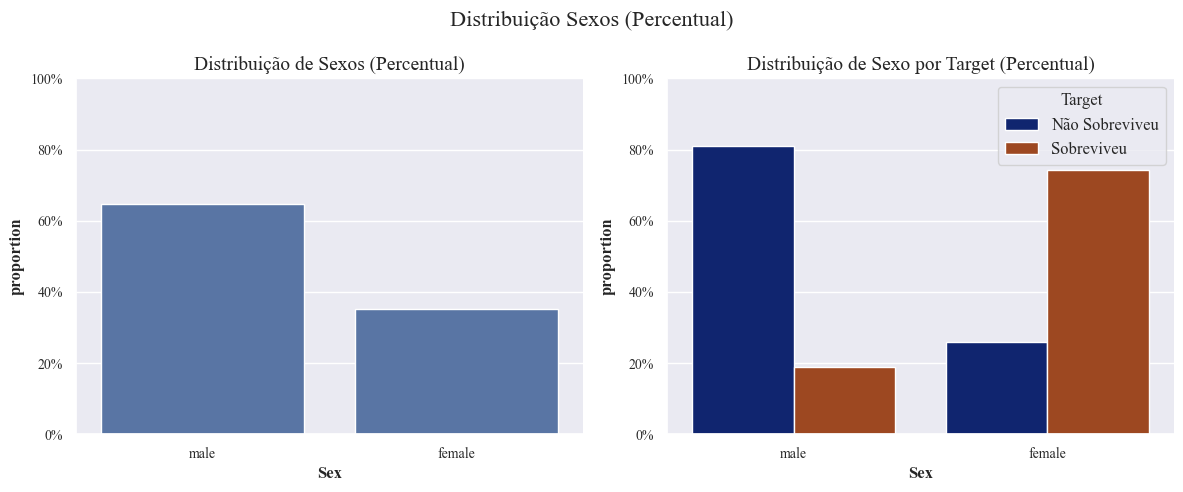

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distribuição Sexos (Percentual)')

sns.barplot(ax=ax[0], data=df_sex, x='Sex', y='proportion', edgecolor='white')
sns.barplot(ax=ax[1], data=df_sex_target, x='Sex', y='proportion', hue='Target', palette='dark', edgecolor='white', order=sex_order)


ax[0].set_title('Distribuição de Sexos (Percentual)')
ax[0].set_ylim(0, 1)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax[1].set_title('Distribuição de Sexo por Target (Percentual)')
ax[1].set_ylim(0, 1)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()

### Variavel: Pclass

In [13]:
count_pclass = df_train['Pclass'].value_counts(dropna=False).reset_index().merge(
                df_train['Pclass'].value_counts(dropna=False, normalize=True).reset_index(), 
                how='inner', on='Pclass'
)
count_pclass

,Pclass,count,proportion
0,3,491,0.551066
1,1,216,0.242424
2,2,184,0.206510


In [14]:
count_pclass_target = df_train.groupby(['Pclass', 'Target']).size().reset_index(name='Count')
count_pclass_target['proportion'] = count_pclass_target.groupby('Pclass')['Count'].transform(lambda x: x / x.sum())
count_pclass_target

C:\Users\esped\AppData\Local\Temp\ipykernel_20788\681016261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_pclass_target = df_train.groupby(['Pclass', 'Target']).size().reset_index(name='Count')
C:\Users\esped\AppData\Local\Temp\ipykernel_20788\681016261.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_pclass_target['proportion'] = count_pclass_target.groupby('Pclass')['Count'].transform(lambda x: x / x.sum())


,Pclass,Target,Count,proportion
0,1,Não Sobreviveu,80,0.370370
1,1,Sobreviveu,136,0.629630
2,2,Não Sobreviveu,97,0.527174
3,2,Sobreviveu,87,0.472826
4,3,Não Sobreviveu,372,0.757637
5,3,Sobreviveu,119,0.242363


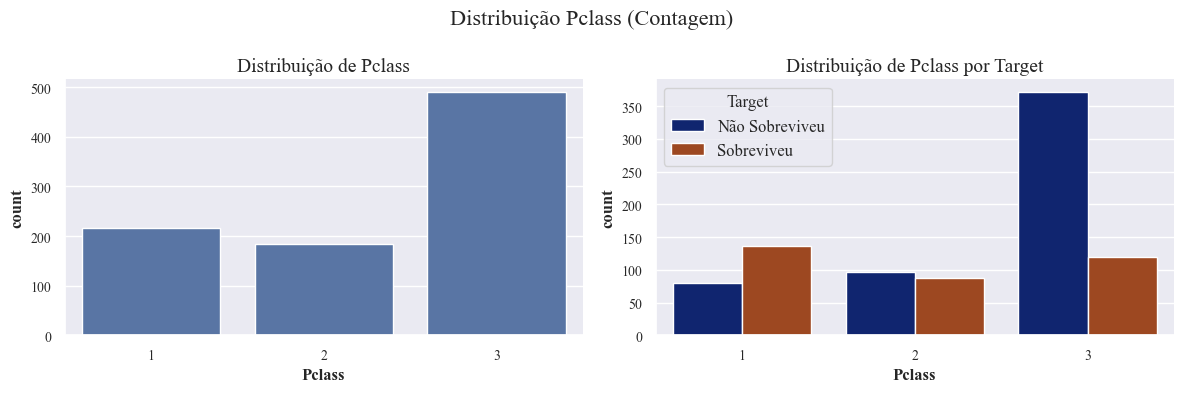

In [15]:
fig, ax = plt.subplots(1,2, figsize = (12, 4))
fig.suptitle('Distribuição Pclass (Contagem)')
sns.countplot(ax = ax[0], data=df_train, x = 'Pclass', order = [1,2,3])
sns.countplot(ax = ax[1], data=df_train, x = 'Pclass', hue = 'Target', order = [1,2,3], palette='dark', edgecolor = 'white')

ax[0].set_title('Distribuição de Pclass')
ax[1].set_title('Distribuição de Pclass por Target')

# Ajustando o layout da figura
plt.tight_layout()
plt.show()


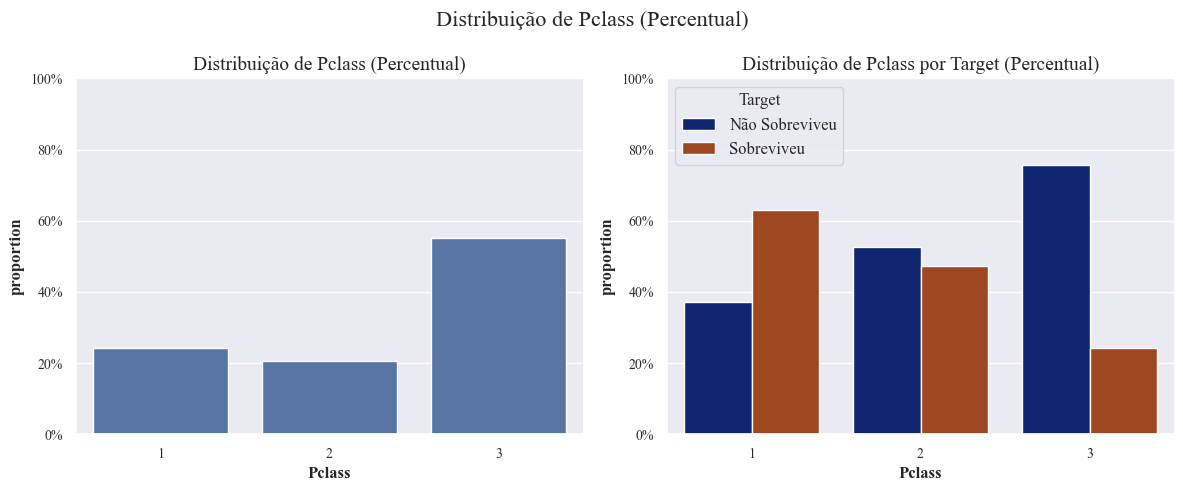

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distribuição de Pclass (Percentual)')

sns.barplot(ax=ax[0], data=count_pclass, x='Pclass', y='proportion', edgecolor='white')
sns.barplot(ax=ax[1], data=count_pclass_target, x='Pclass', y='proportion', hue='Target', palette='dark', edgecolor='white')

# Configurações
ax[0].set_title('Distribuição de Pclass (Percentual)')
ax[0].set_ylim(0, 1)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax[1].set_title('Distribuição de Pclass por Target (Percentual)')
ax[1].set_ylim(0, 1)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()

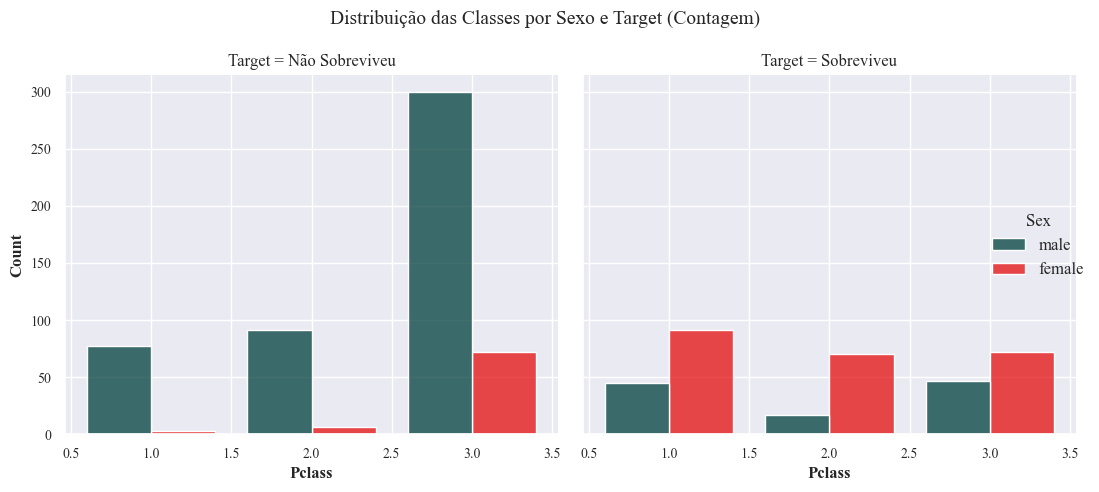

In [17]:
custom_palette = {'male': '#003f3c', 'female': '#e50e0e'}
# Criando o gráfico
grafico = sns.displot(
    data=df_train, x='Pclass', hue='Sex', multiple="dodge", shrink=.8, col='Target',
    palette=custom_palette, edgecolor = 'white')

grafico.fig.suptitle('Distribuição das Classes por Sexo e Target (Contagem)', fontsize=14)

# Ajustando a posição do título para que não sobreponha os subplots
grafico.fig.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()


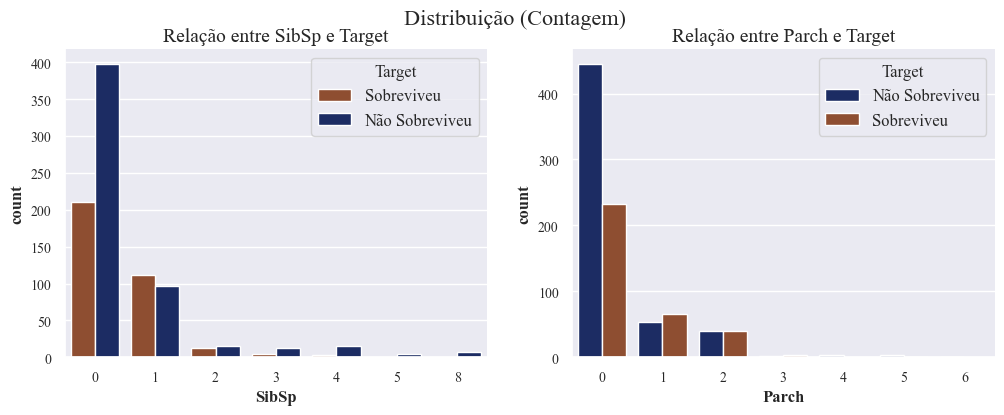

In [18]:
# sns.histplot(data=df_train, x = 'SibSp', hue = 'Target', palette='dark', edgecolor = 'white', multiple="dodge")

# Definir a paleta de cores para 'Sobreviveu' e 'Não Sobreviveu'
palette_dict = {'Sobreviveu': '#9D4821', 'Não Sobreviveu': '#10256F'}
fig, ax = plt.subplots(1, 2, figsize = (12,4))
fig.suptitle('Distribuição (Contagem)')
sns.countplot(ax = ax[0],data=df_train, x = 'SibSp', hue = 'Target', palette=palette_dict, edgecolor = 'white')
sns.countplot(ax = ax[1],data=df_train, x = 'Parch', hue = 'Target', palette=palette_dict, edgecolor = 'white')

ax[0].set_title('Relação entre SibSp e Target')
ax[1].set_title('Relação entre Parch e Target')
plt.show()

### Construção da Variavel: FamilySize

In [19]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
count_family_target = df_train.groupby(['FamilySize', 'Target']).size().reset_index(name='Count')
count_family_target['proportion'] = count_family_target.groupby('FamilySize')['Count'].transform(lambda x: x / x.sum())
count_family_target

,FamilySize,Target,Count,proportion
0,1,Não Sobreviveu,374,0.696462
1,1,Sobreviveu,163,0.303538
2,2,Não Sobreviveu,72,0.447205
3,2,Sobreviveu,89,0.552795
4,3,Não Sobreviveu,43,0.421569
5,3,Sobreviveu,59,0.578431
6,4,Não Sobreviveu,8,0.275862
7,4,Sobreviveu,21,0.724138
8,5,Não Sobreviveu,12,0.800000
9,5,Sobreviveu,3,0.200000


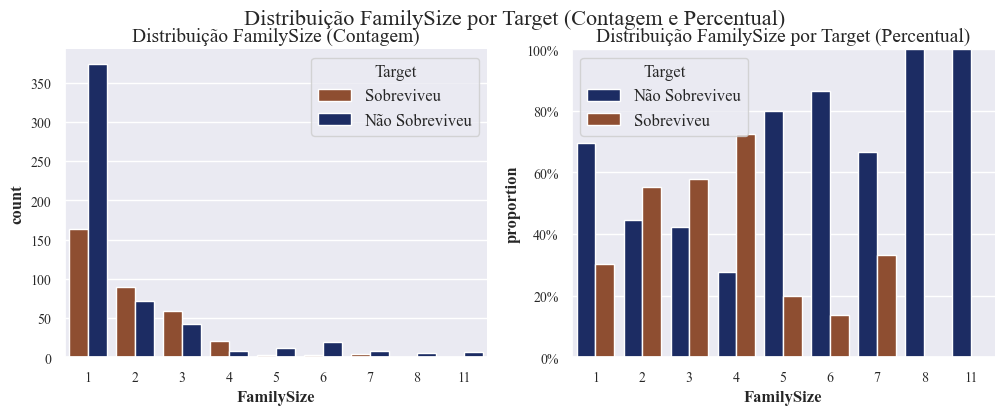

In [20]:
# Definir a paleta de cores para 'Sobreviveu' e 'Não Sobreviveu'
palette_dict = {'Sobreviveu': '#9D4821', 'Não Sobreviveu': '#10256F'}
fig, ax = plt.subplots(1, 2, figsize = (12,4))
fig.suptitle('Distribuição FamilySize por Target (Contagem e Percentual)')
sns.countplot(ax = ax[0],data=df_train, x = 'FamilySize', hue = 'Target', palette=palette_dict, edgecolor = 'white')
sns.barplot(  ax = ax[1],data=count_family_target, x = 'FamilySize', y = 'proportion',hue = 'Target', palette=palette_dict, edgecolor = 'white')
fig.subplots_adjust(top=0.88)

ax[0].set_title('Distribuição FamilySize (Contagem)')
ax[1].set_title('Distribuição FamilySize por Target (Percentual)')
ax[1].set_ylim(0, 1)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

### Contrução da Variável: IsAlone

In [21]:
# Utilizando np.where para criar a coluna IsAlone
df_train['IsAlone'] = np.where(
    df_train['FamilySize'] == 1, 1,
    np.where(df_train['FamilySize'] > 4, 2, 
             0)
)
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Não Sobreviveu,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Sobreviveu,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Sobreviveu,1,1


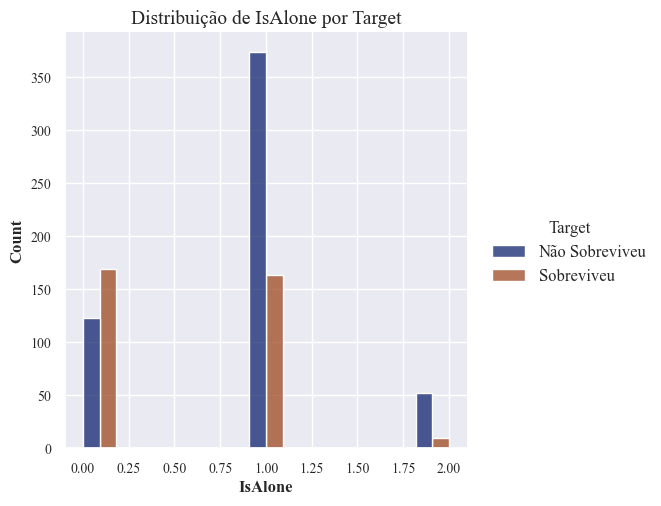

In [22]:
sns.displot(data = df_train, x = 'IsAlone', hue='Target', multiple="dodge", palette=palette_dict, edgecolor = 'white')
plt.title('Distribuição de IsAlone por Target')
plt.show()

### Variável: Embarked

In [23]:
count_embarked = df_train['Embarked'].value_counts(dropna=False).reset_index().merge(
    df_train['Embarked'].value_counts(dropna=False, normalize=True).reset_index(),
    how = 'inner', on = 'Embarked'
)
count_embarked

,Embarked,count,proportion
0,S,644,0.722783
1,C,168,0.188552
2,Q,77,0.086420
3,NaN,2,0.002245


In [24]:
count_embarked_target = df_train.groupby(['Embarked', 'Target']).size().reset_index(name='Count')
count_embarked_target['proportion'] = count_embarked_target.groupby('Embarked')['Count'].transform(lambda x: x / x.sum())
count_embarked_target

,Embarked,Target,Count,proportion
0,C,Não Sobreviveu,75,0.446429
1,C,Sobreviveu,93,0.553571
2,Q,Não Sobreviveu,47,0.610390
3,Q,Sobreviveu,30,0.389610
4,S,Não Sobreviveu,427,0.663043
5,S,Sobreviveu,217,0.336957


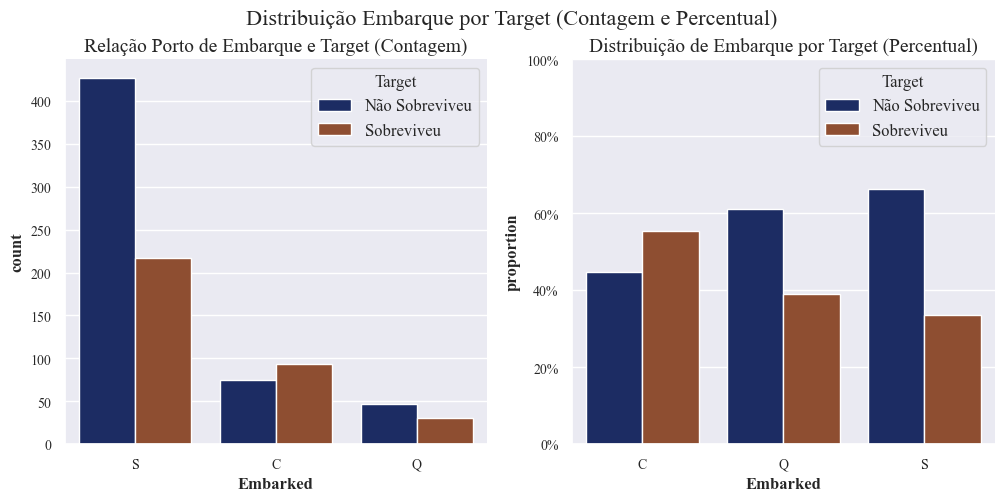

In [25]:
# Outras opções
# grafico = sns.displot(data = df_train, x = 'Embarked', hue='Target', multiple="dodge", palette=palette_dict)
# sns.countplot(data = df_train, x = 'Embarked', hue='Target', palette=palette_dict)
# plt.title('Relação Porto de Embarque e Sobrevivência')
# plt.show()
fig, ax = plt.subplots(1, 2, figsize = (12,5))
fig.suptitle('Distribuição Embarque por Target (Contagem e Percentual) ')
sns.countplot(ax = ax[0], data = df_train, x = 'Embarked', hue='Target', palette=palette_dict)
sns.barplot( ax = ax[1], data = count_embarked_target, x = 'Embarked', y='proportion', hue='Target', palette=palette_dict)
ax[0].set_title('Relação Porto de Embarque e Target (Contagem)')
ax[1].set_title('Distribuição de Embarque por Target (Percentual)')
ax[1].set_ylim(0, 1)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

### Variável: Cabin

In [26]:
# Tratando NaN na coluna 'Cabin' como "NULO"
df_train['Cabin'].fillna('NULO', inplace=True)

# Quebrando a coluna 'Cabin' em duas novas colunas: 'Cabin_Letter' e 'Cabin_Number'
df_train['Cabin_Letter'] = df_train['Cabin'].str.extract(r'([a-zA-Z]+)', expand=False)
df_train['Cabin_Number'] = df_train['Cabin'].str.extract(r'(\d+)', expand=False)

C:\Users\esped\AppData\Local\Temp\ipykernel_20788\3402610451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Cabin'].fillna('NULO', inplace=True)


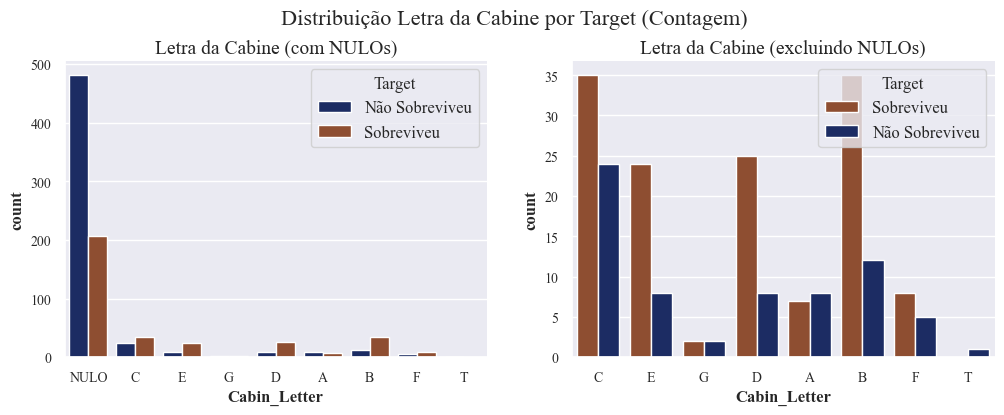

In [27]:
# sns.displot(data=df_train, x = 'Cabin_Letter', hue='Target', multiple="dodge", shrink=.8)

fig, ax = plt.subplots(1, 2, figsize = (12,4))
fig.suptitle('Distribuição Letra da Cabine por Target (Contagem)')
sns.countplot(ax = ax[0], data=df_train, x = 'Cabin_Letter', hue='Target', palette=palette_dict)
sns.countplot(ax = ax[1], data=df_train.query('Cabin_Letter != "NULO"'), x = 'Cabin_Letter', hue='Target', palette=palette_dict)

# Título da figura
ax[0].set_title('Letra da Cabine (com NULOs)')
ax[1].set_title('Letra da Cabine (excluindo NULOs)')
fig.subplots_adjust(top=0.85)
plt.show()

### Contrução da Variavel: Title 

In [28]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target,FamilySize,IsAlone,Cabin_Letter,Cabin_Number,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NULO,S,Não Sobreviveu,2,0,NULO,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Sobreviveu,2,0,C,85,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NULO,S,Sobreviveu,1,1,NULO,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Sobreviveu,2,0,C,123,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NULO,S,Não Sobreviveu,1,1,NULO,NaN,Mr


In [29]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [30]:
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess', 'Dona'],'Royalty')
df_train['Title'] = df_train['Title'].replace(['Mme'], 'Mrs')
df_train['Title'] = df_train['Title'].replace(['Mlle','Ms'], 'Miss')
df_train['Title'] = df_train['Title'].replace(['Capt', 'Col', 'Major','Rev'], 'Officer')
df_train['Title'] = df_train['Title'].replace(['Jonkheer', 'Don','Sir'], 'Royalty')
df_train.loc[(df_train.Sex == 'male')   & (df_train.Title == 'Dr'),'Title'] = 'Mr'
df_train.loc[(df_train.Sex == 'female') & (df_train.Title == 'Dr'),'Title'] = 'Mrs'

#: count survived rate for different titles
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.795276
1,Miss,0.702703
5,Royalty,0.600000
0,Master,0.575000
4,Officer,0.181818
2,Mr,0.158700


In [31]:
count_title_target = df_train.groupby(['Title', 'Target']).size().reset_index(name='Count')
count_title_target['proportion'] = count_title_target.groupby('Title')['Count'].transform(lambda x: x / x.sum())

# Calcular a proporção em relação ao total geral
total_count = count_title_target['Count'].sum()
count_title_target['proportion_total'] = (count_title_target['Count'] / total_count)

count_title_target.sort_values(by=['Target', 'proportion'], ascending=[False, False])

,Title,Target,Count,proportion,proportion_total
7,Mrs,Sobreviveu,101,0.795276,0.113356
3,Miss,Sobreviveu,130,0.702703,0.145903
11,Royalty,Sobreviveu,3,0.600000,0.003367
1,Master,Sobreviveu,23,0.575000,0.025814
9,Officer,Sobreviveu,2,0.181818,0.002245
5,Mr,Sobreviveu,83,0.158700,0.093154
4,Mr,Não Sobreviveu,440,0.841300,0.493827
8,Officer,Não Sobreviveu,9,0.818182,0.010101
0,Master,Não Sobreviveu,17,0.425000,0.019080
10,Royalty,Não Sobreviveu,2,0.400000,0.002245


In [32]:
print(count_title_target['Title'].unique())

['Master' 'Miss' 'Mr' 'Mrs' 'Officer' 'Royalty']


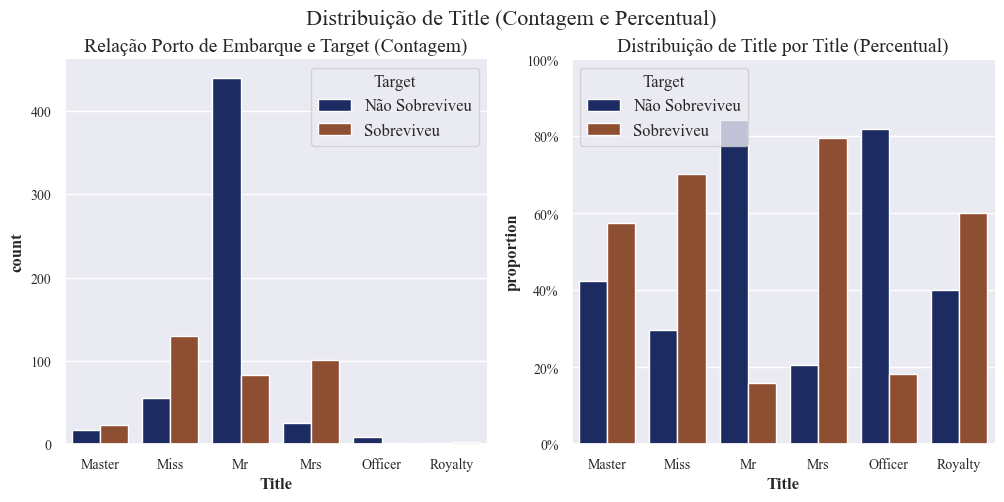

In [33]:
order_title = ['Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']
fig, ax = plt.subplots(1, 2, figsize = (12,5))
fig.suptitle('Distribuição de Title (Contagem e Percentual) ')
sns.countplot(ax = ax[0], data = df_train, x = 'Title', hue='Target', palette=palette_dict, order=order_title)
sns.barplot( ax = ax[1], data = count_title_target, x = 'Title', y='proportion', hue='Target', palette=palette_dict, order=order_title)
ax[0].set_title('Relação Porto de Embarque e Target (Contagem)')
ax[1].set_title('Distribuição de Title por Title (Percentual)')
ax[1].set_ylim(0, 1)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

## Númericas

Tipo Númericas:
- Age
- Fare
- Ticket

In [34]:
df_train[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Variável: Idade

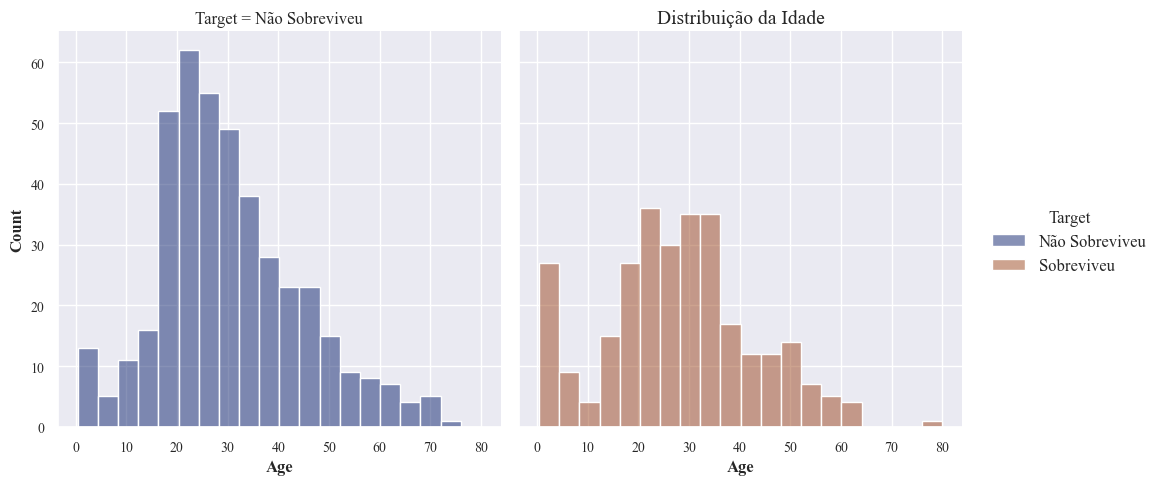

In [35]:
sns.displot(data=df_train, x = 'Age', hue='Target', col='Target', palette=palette_dict)
plt.title('Distribuição da Idade')
plt.show()

### Contrução da Variavel: AgeBand

In [36]:
## # create Age bands and determine correlations with Survived
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
count_AgeBand = df_train['AgeBand'].value_counts().reset_index()
count_AgeBand

,AgeBand,count
0,"(16.336, 32.252]",346
1,"(32.252, 48.168]",188
2,"(0.34, 16.336]",100
3,"(48.168, 64.084]",69
4,"(64.084, 80.0]",11


In [37]:

count_AgeBand_target = df_train.groupby(['AgeBand', 'Target']).size().reset_index(name= 'Count')
count_AgeBand_target['proportion'] = count_AgeBand_target.groupby('AgeBand')['Count'].transform(lambda x: x / x.sum())
count_AgeBand_target.sort_values(by = 'Target', ascending=False)

C:\Users\esped\AppData\Local\Temp\ipykernel_20788\1762197453.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_AgeBand_target = df_train.groupby(['AgeBand', 'Target']).size().reset_index(name= 'Count')
C:\Users\esped\AppData\Local\Temp\ipykernel_20788\1762197453.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_AgeBand_target['proportion'] = count_AgeBand_target.groupby('AgeBand')['Count'].transform(lambda x: x / x.sum())


,AgeBand,Target,Count,proportion
1,"(0.34, 16.336]",Sobreviveu,55,0.550000
3,"(16.336, 32.252]",Sobreviveu,128,0.369942
5,"(32.252, 48.168]",Sobreviveu,76,0.404255
7,"(48.168, 64.084]",Sobreviveu,30,0.434783
9,"(64.084, 80.0]",Sobreviveu,1,0.090909
0,"(0.34, 16.336]",Não Sobreviveu,45,0.450000
2,"(16.336, 32.252]",Não Sobreviveu,218,0.630058
4,"(32.252, 48.168]",Não Sobreviveu,112,0.595745
6,"(48.168, 64.084]",Não Sobreviveu,39,0.565217
8,"(64.084, 80.0]",Não Sobreviveu,10,0.909091


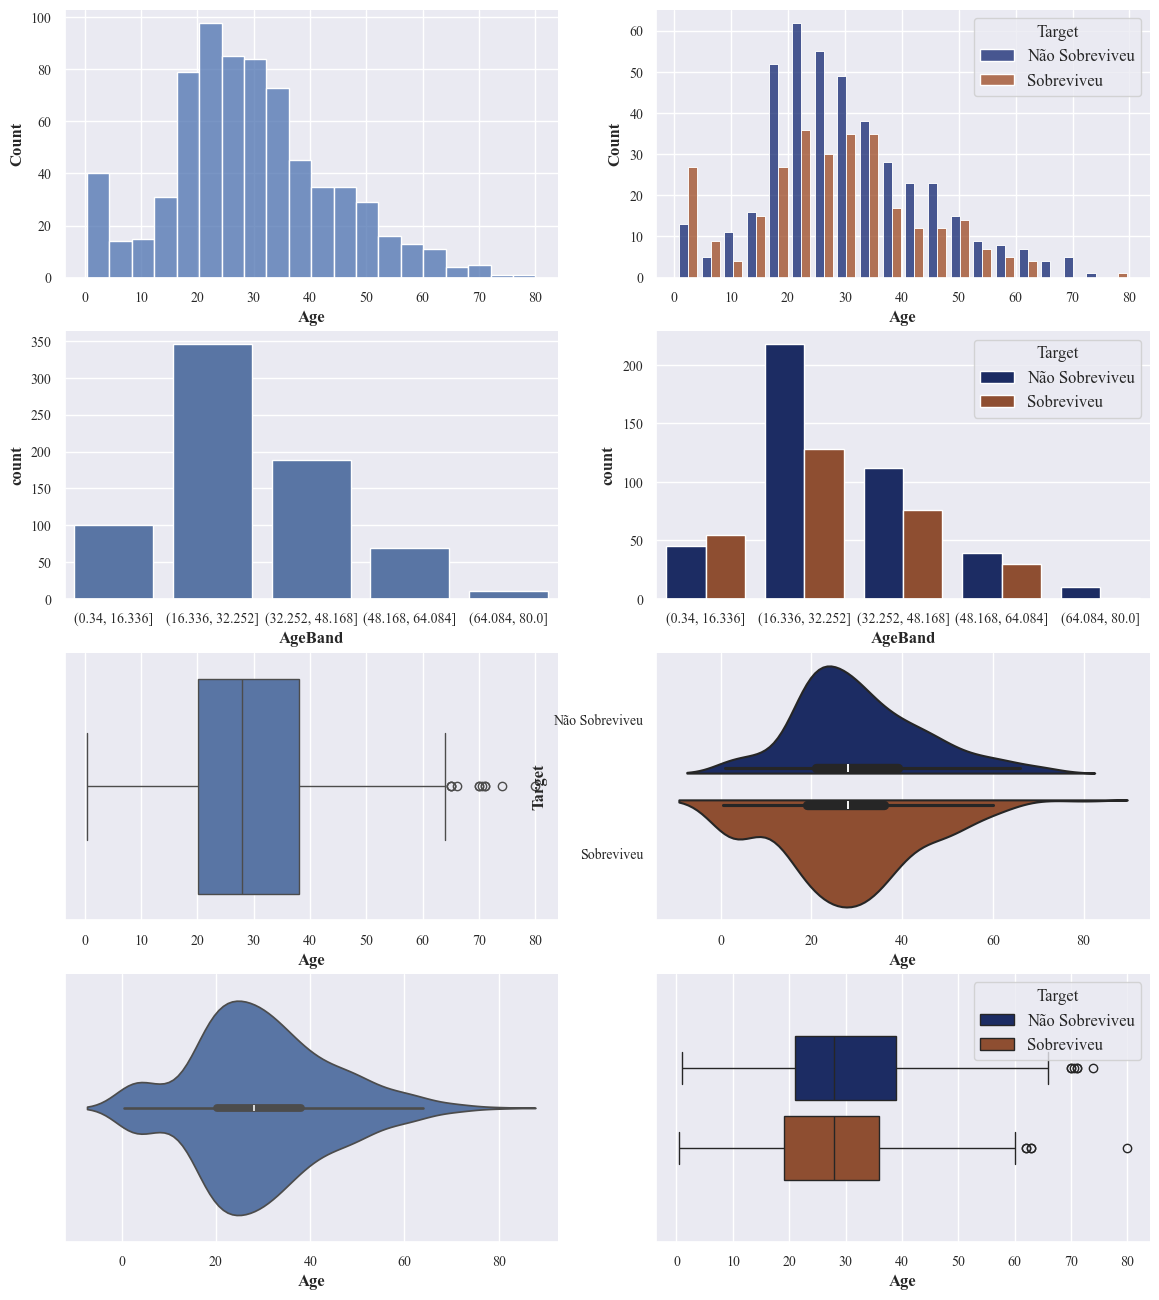

In [38]:
fig, ax = plt.subplots(4,2, figsize=(14, 16))
ax = ax.flatten()
sns.histplot(  ax = ax[0], data = df_train, x='Age')
sns.histplot(  ax = ax[1], data = df_train, x='Age', hue="Target", multiple="dodge", palette=palette_dict, shrink=.8)
sns.countplot( ax = ax[2], data = df_train, x = 'AgeBand')
sns.countplot( ax = ax[3], data = df_train, x = 'AgeBand', hue="Target", palette=palette_dict)
sns.boxplot(   ax = ax[4], data = df_train, x = "Age")
sns.violinplot(ax = ax[5], data = df_train, x="Age", y="Target", hue="Target", palette=palette_dict, split=True, linewidth=1.5)
sns.violinplot(ax = ax[6], data = df_train, x = "Age")
sns.boxplot(   ax = ax[7], data = df_train, x = "Age", hue = 'Target', gap = 1.8, palette=palette_dict, width=0.6, dodge=True)
plt.show()

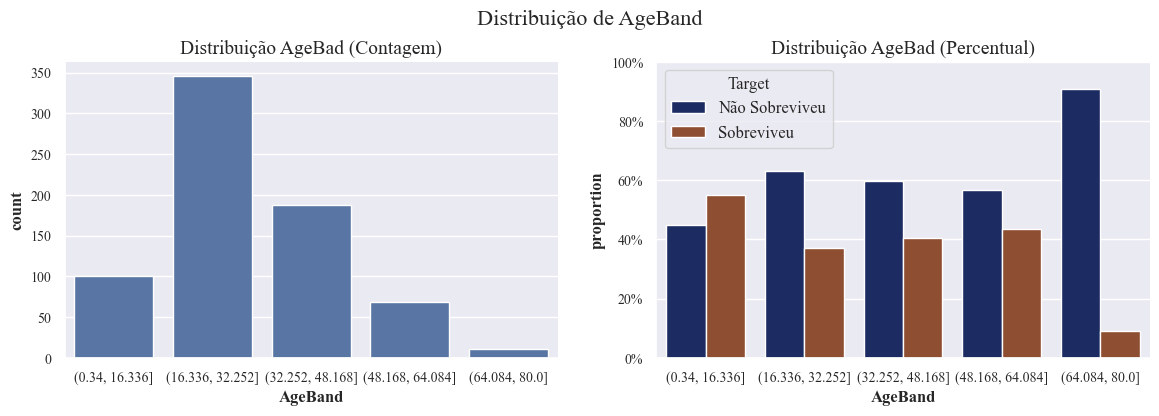

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (14,4))
fig.suptitle('Distribuição de AgeBand')
sns.countplot(ax = ax[0], data=df_train, x = 'AgeBand')
sns.barplot(ax = ax[1], data = count_AgeBand_target, x = 'AgeBand', y='proportion', hue='Target', palette=palette_dict)

# Título da figura
ax[0].set_title('Distribuição AgeBad (Contagem)')
ax[1].set_title('Distribuição AgeBad (Percentual)')
ax[1].set_ylim(0, 1)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
fig.subplots_adjust(top=0.85)
plt.show()
plt.show()

### Variável: Fare

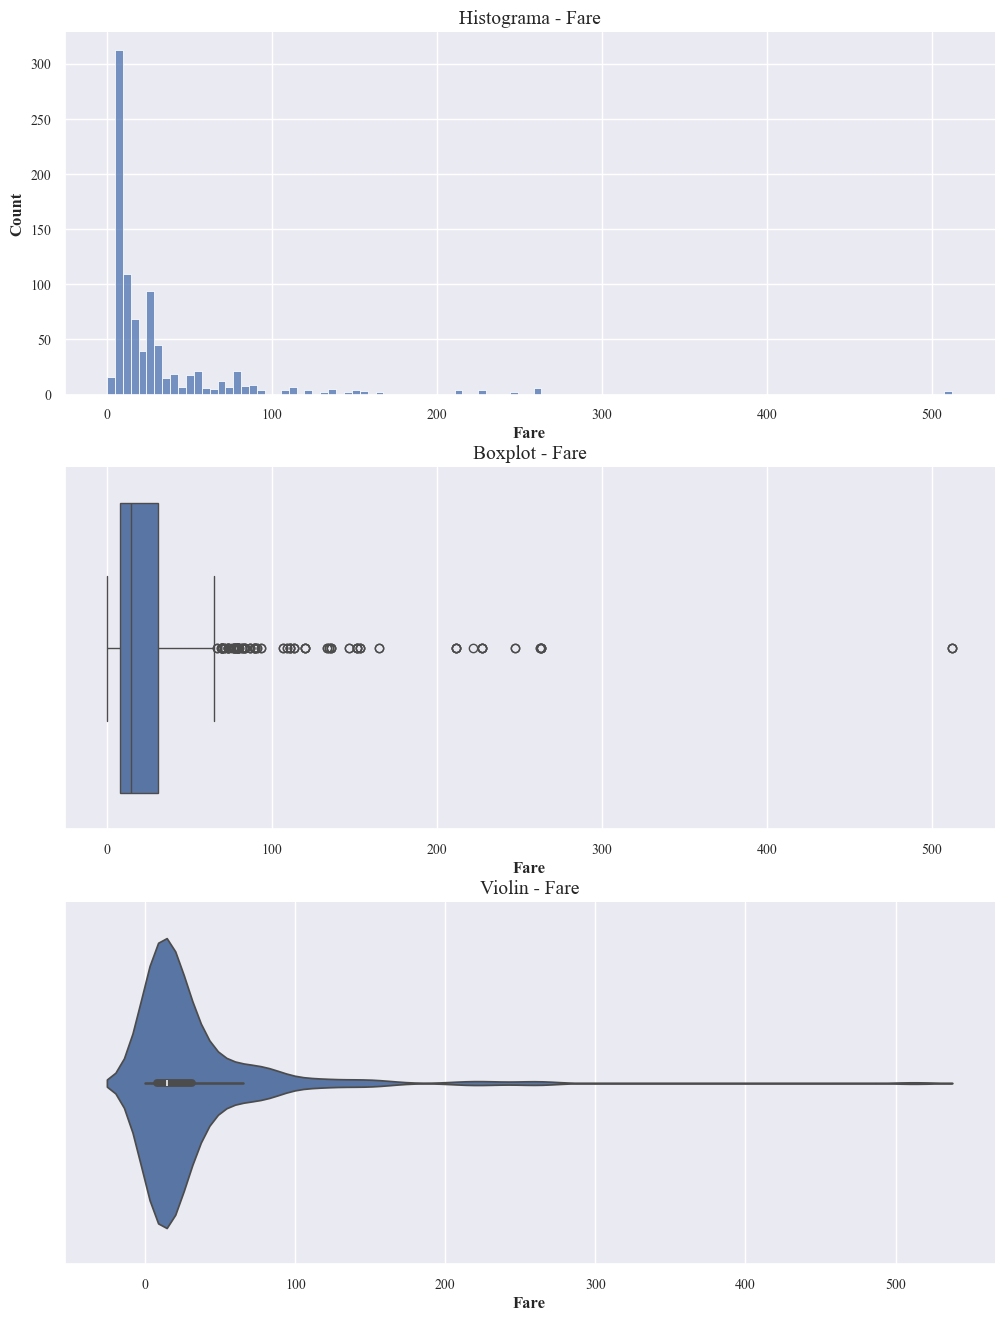

In [40]:
fig, ax = plt.subplots(3,1, figsize=(12, 16))
ax = ax.flatten()
sns.histplot(  ax = ax[0], data = df_train, x='Fare')
ax[0].set_title('Histograma - Fare')
sns.boxplot(   ax = ax[1], data = df_train, x = "Fare")
ax[1].set_title('Boxplot - Fare')
sns.violinplot(ax = ax[2], data = df_train, x = "Fare")
ax[2].set_title('Violin - Fare')
plt.show()

### Contrução da Variavel: FareBand

In [41]:
df_train['FareBand'] = pd.qcut(df_train['Fare'], 5)

count_FareBand = df_train['FareBand'].value_counts().reset_index()
count_FareBand

,FareBand,count
0,"(7.854, 10.5]",184
1,"(21.679, 39.688]",180
2,"(-0.001, 7.854]",179
3,"(39.688, 512.329]",176
4,"(10.5, 21.679]",172


In [42]:
count_FareBad_target = df_train.groupby(['FareBand', 'Target']).size().reset_index(name= 'Count')
count_FareBad_target['proportion'] = count_FareBad_target.groupby('FareBand')['Count'].transform(lambda x: x / x.sum())
count_FareBad_target.sort_values(by = 'Target', ascending=False)

C:\Users\esped\AppData\Local\Temp\ipykernel_20788\3844351077.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_FareBad_target = df_train.groupby(['FareBand', 'Target']).size().reset_index(name= 'Count')
C:\Users\esped\AppData\Local\Temp\ipykernel_20788\3844351077.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_FareBad_target['proportion'] = count_FareBad_target.groupby('FareBand')['Count'].transform(lambda x: x / x.sum())


,FareBand,Target,Count,proportion
1,"(-0.001, 7.854]",Sobreviveu,39,0.217877
3,"(7.854, 10.5]",Sobreviveu,37,0.201087
5,"(10.5, 21.679]",Sobreviveu,73,0.424419
7,"(21.679, 39.688]",Sobreviveu,80,0.444444
9,"(39.688, 512.329]",Sobreviveu,113,0.642045
0,"(-0.001, 7.854]",Não Sobreviveu,140,0.782123
2,"(7.854, 10.5]",Não Sobreviveu,147,0.798913
4,"(10.5, 21.679]",Não Sobreviveu,99,0.575581
6,"(21.679, 39.688]",Não Sobreviveu,100,0.555556
8,"(39.688, 512.329]",Não Sobreviveu,63,0.357955


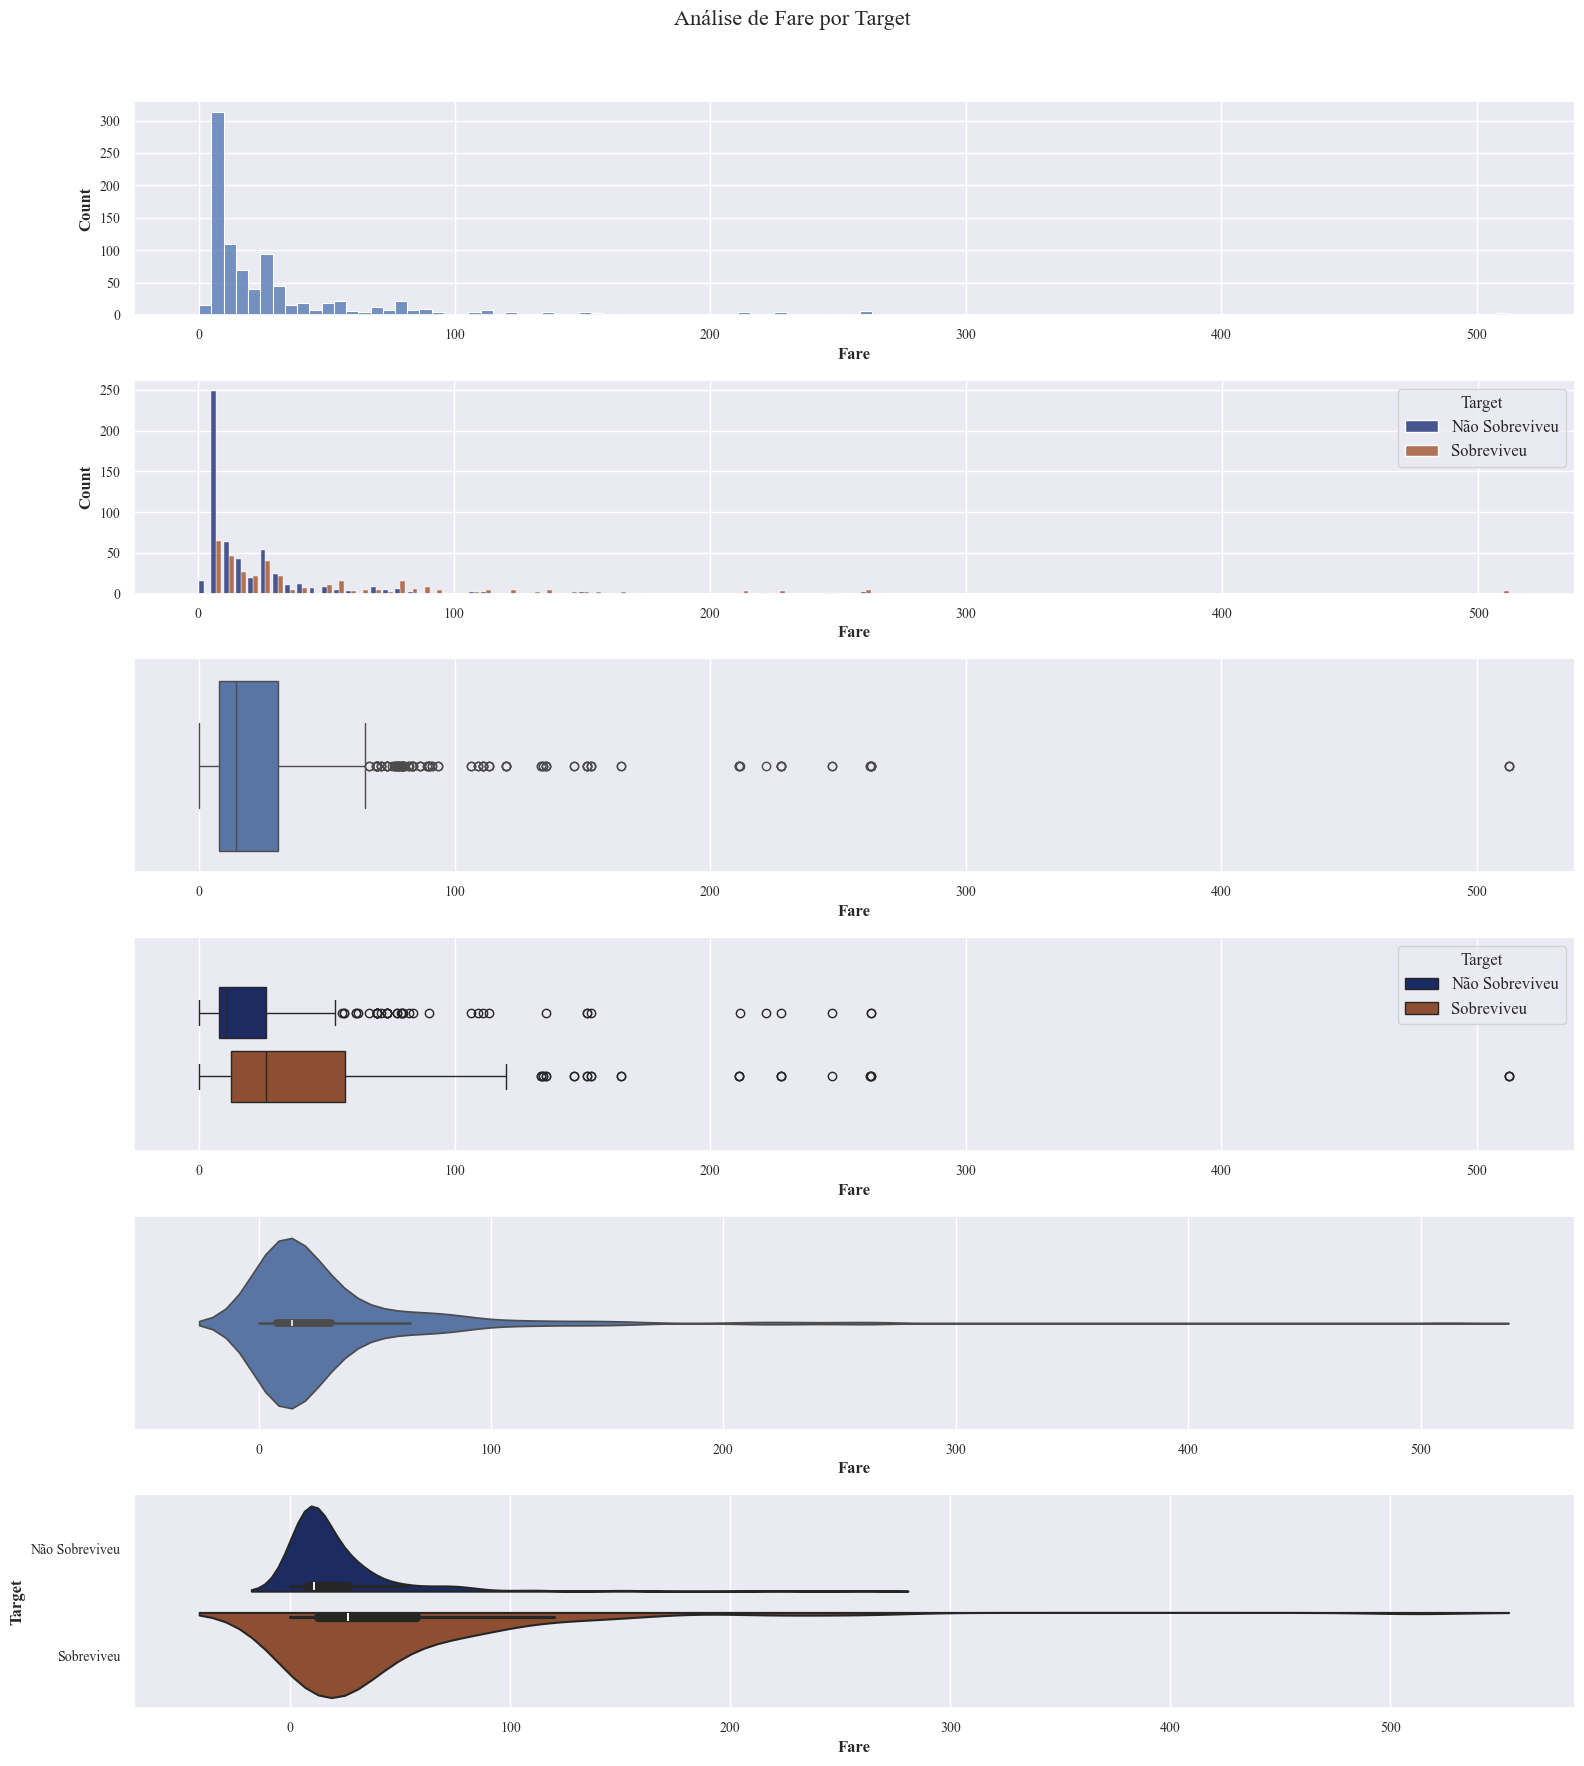

In [43]:
fig, ax = plt.subplots(6,1, figsize=(16, 18))
ax = ax.flatten()
sns.histplot(  ax = ax[0], data = df_train, x='Fare')
sns.histplot(  ax = ax[1], data = df_train, x='Fare', hue="Target", multiple="dodge", palette=palette_dict, shrink=.8)
sns.boxplot(   ax = ax[2], data = df_train, x = "Fare")
sns.boxplot(   ax = ax[3], data = df_train, x = "Fare", hue = 'Target', gap = 1.8, palette=palette_dict, width=0.6, dodge=True)
sns.violinplot(ax = ax[4], data = df_train, x = "Fare")
sns.violinplot(ax = ax[5], data = df_train, x="Fare", y="Target", hue="Target", palette=palette_dict, split=True, linewidth=1.5)
# Adicionando um título único para a figura inteira
fig.suptitle('Análise de Fare por Target', fontsize=16)

# Ajustando o layout da figura para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

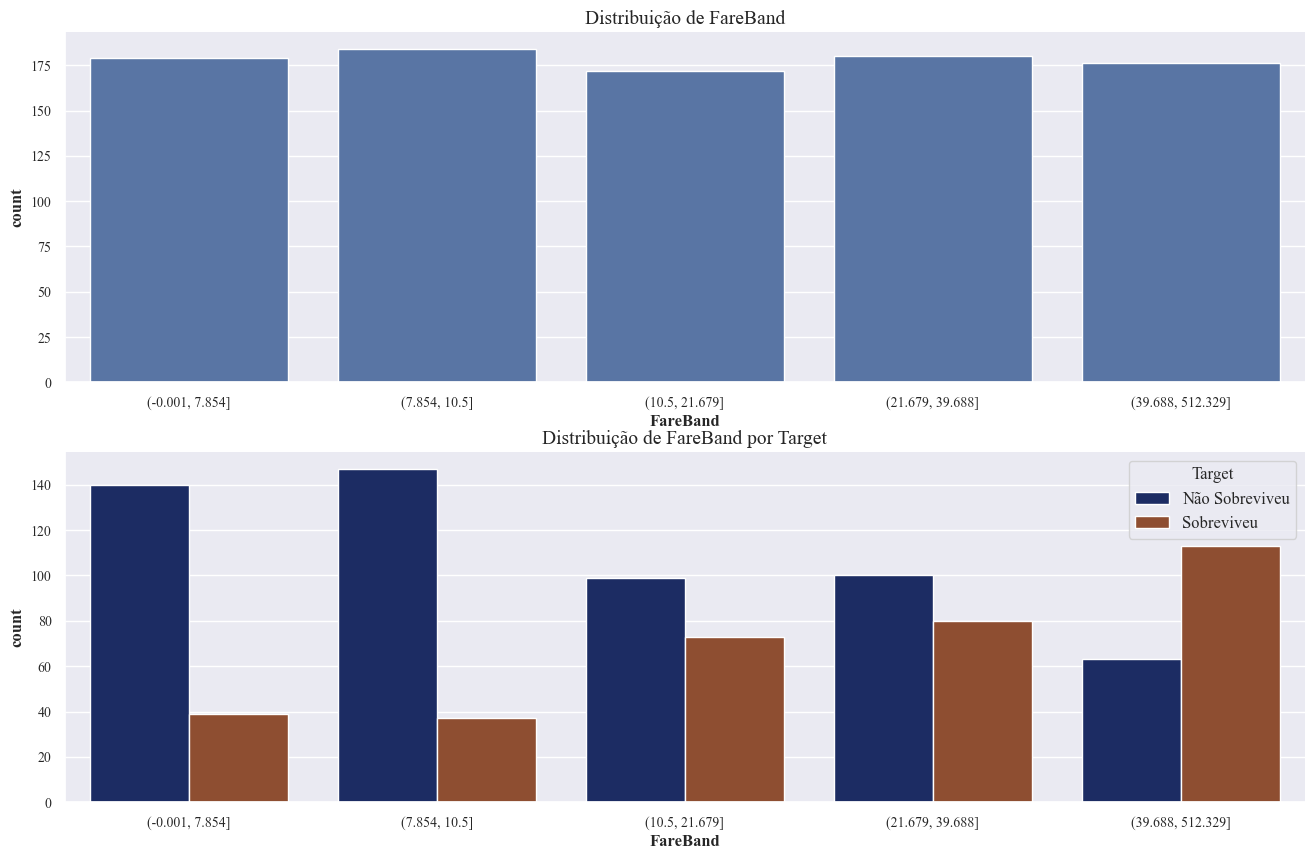

In [44]:
fig, ax = plt.subplots(2,1, figsize=(16, 10))
ax = ax.flatten()

sns.countplot( ax = ax[0], data = df_train, x = 'FareBand')
ax[0].set_title('Distribuição de FareBand')
sns.countplot( ax = ax[1], data = df_train, x = 'FareBand', hue="Target", palette=palette_dict)
ax[1].set_title('Distribuição de FareBand por Target')
plt.show()